# SOMETHING ABOUT IRIS

In [14]:
import os
import numpy
import pandas
import seaborn
import minisom
from matplotlib import pyplot

## INPUT PARAMETERS HERE

In [15]:
# DATA PARAMETERS
random_seed = 42
som_size = 10
lr = 0.01
max_epochs = 1000
file_name = 'iris.data'
var_types = {'petallength' : 'float',
             'petalwidth' : 'float',
             'sepallength' : 'float',
             'sepalwidth' : 'float',
             'flower' : 'str'}

c:\Users\User\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


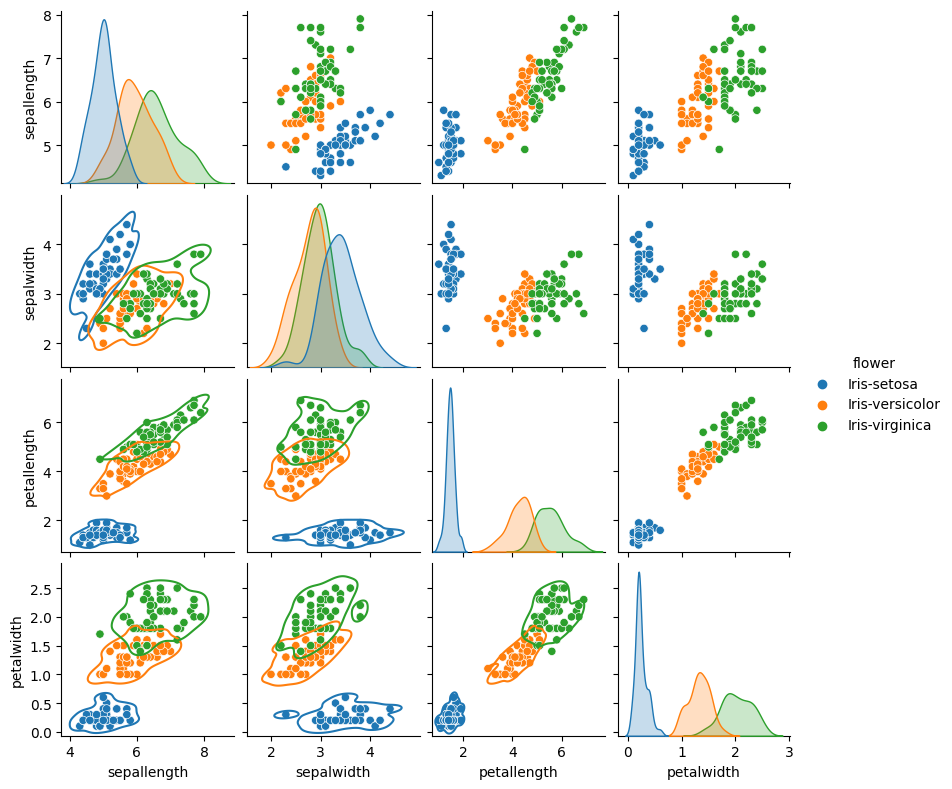

In [16]:
# IMPORT AND CONVERT
working_dir = os.getcwd()
notebooks_dir = os.path.dirname(working_dir)
root_dir = os.path.dirname(notebooks_dir)
data_dir = os.path.join(root_dir, 'datasets')
iris_file = os.path.join(data_dir, file_name)
df = pandas.read_csv(iris_file)
for input_col in var_types.keys():
    df[input_col] = df[input_col].astype(var_types[input_col])

# SCATTER PLOT
g = seaborn.pairplot(df, hue='flower', height=2, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

## SOM COOKING

In [18]:
my_cols = ['petallength', 'petalwidth', 'sepallength', 'sepalwidth']
data = df[my_cols].to_numpy()
n_rows, n_columns = som_size, som_size
# som = simpsom.SOMNet(n_rows, n_columns, data, PBC=True, random_seed=random_seed)
# som.train(train_algo='batch', start_learning_rate=lr, epochs=max_epochs)
data_normalized = (data - numpy.mean(data, axis=0)) / numpy.std(data, axis=0)

# Initialization and training
som_shape = (1, 3)
som = minisom.MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.7500395964258638


In [20]:
# each neuron represents a cluster
winner_coordinates = numpy.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = numpy.ravel_multi_index(winner_coordinates, som_shape)

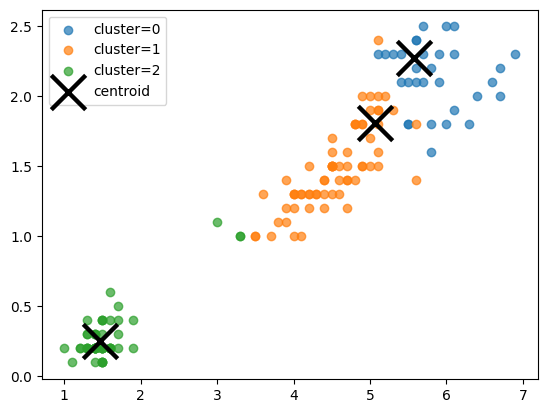

In [24]:
# plotting the clusters using the first 2 dimentions of the data
for c in numpy.unique(cluster_index):
    pyplot.scatter(data[cluster_index == c, 0], data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    pyplot.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=5, linewidths=35, color='k', label='centroid')
pyplot.legend();